In [1]:
import pandas as pd 
import seaborn as sns

dataset = pd.read_csv("vertebral_column_data/column_3C.dat", header = None, sep = " ")
train_dataset = dataset[dataset.columns[:-1]]
training_classis = dataset.iloc[:,-1]
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
dataset_target_labels = le.fit_transform(training_classis)

In [2]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train_dataset, dataset_target_labels, test_size=0.35)

In [4]:
Xtrain.shape, Xtest.shape

((201, 6), (109, 6))

In [5]:

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.8165137614678899

In [6]:
Ytrain_pred = clf.predict(Xtrain)
Ytest_pred = clf.predict(Xtest)

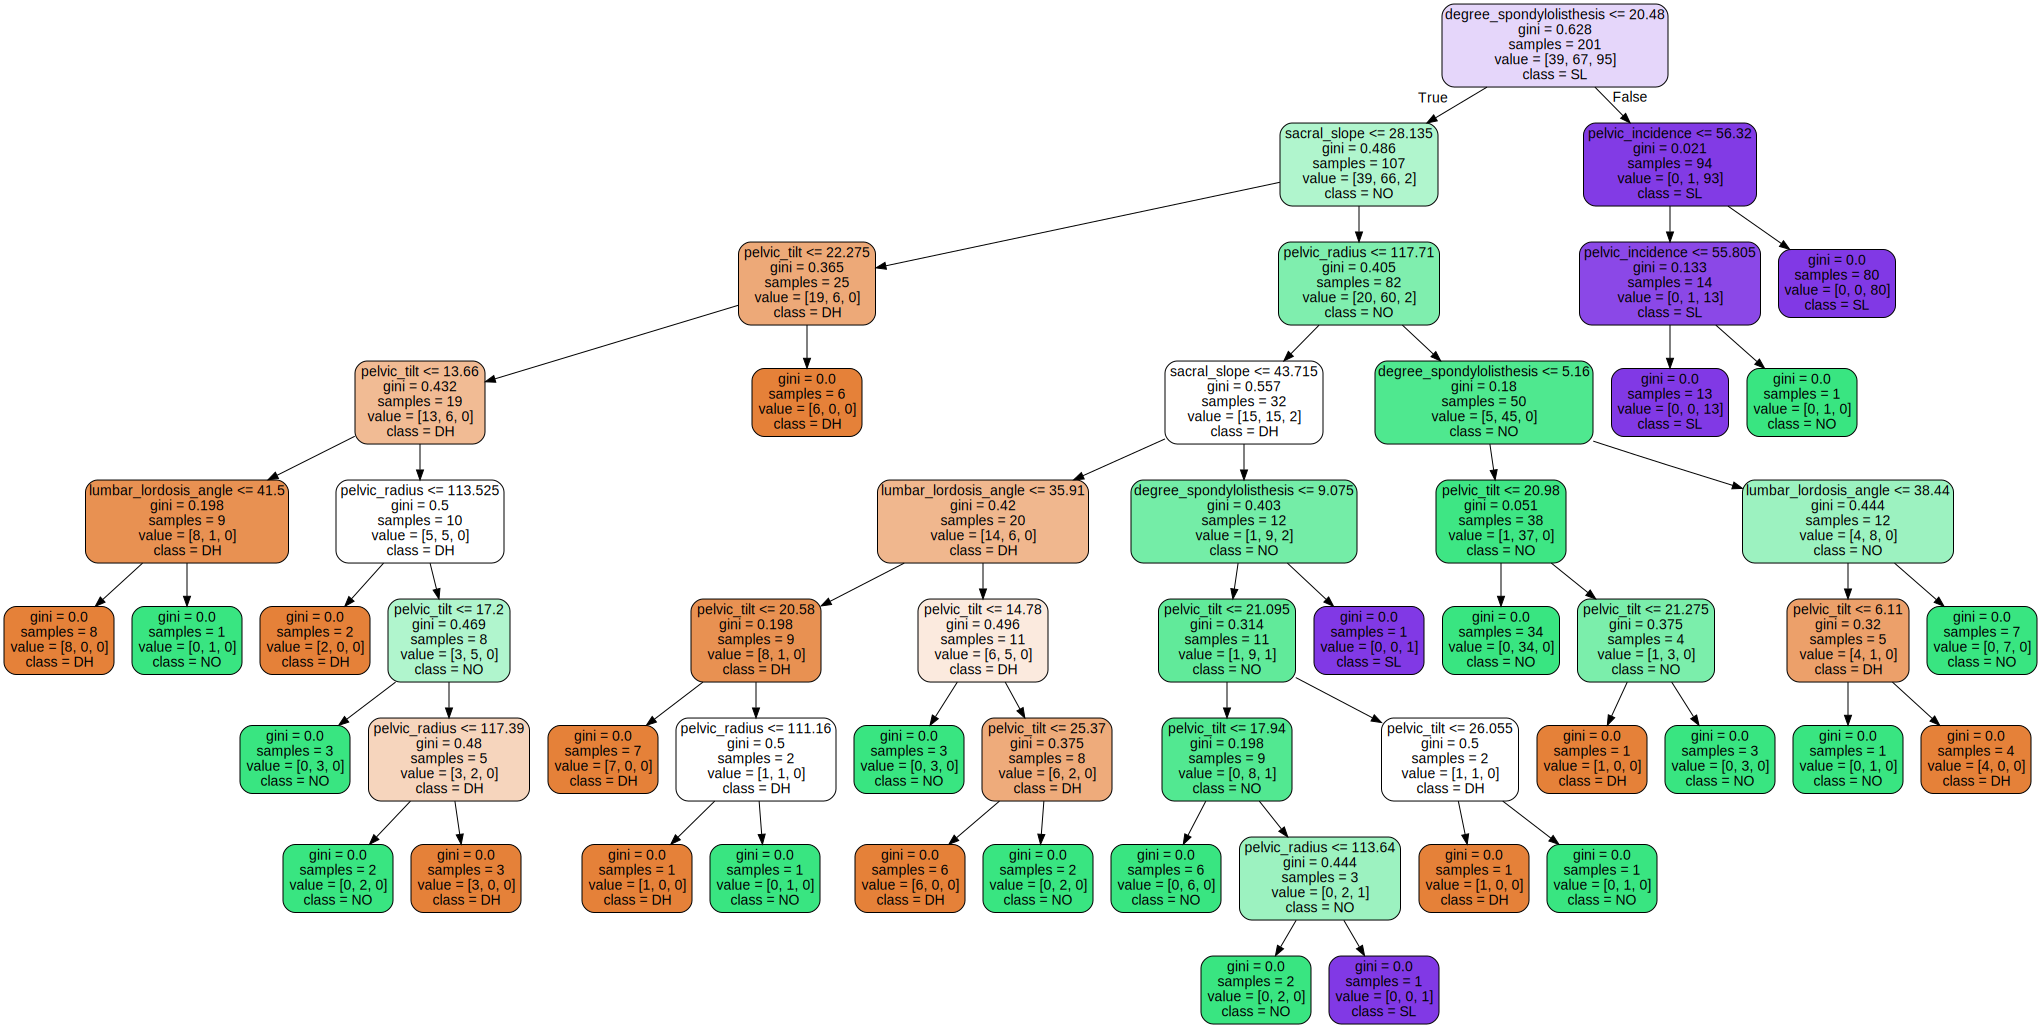

In [7]:
import graphviz
feature_name = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]
classes = ["DH", "NO", "SL"]
dot_data = tree.export_graphviz(clf
                               ,feature_names= feature_name
                               ,class_names=classes
                               ,filled= True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [8]:
from sklearn.metrics import confusion_matrix
def confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.8165137614678899
Train Confusion matrix


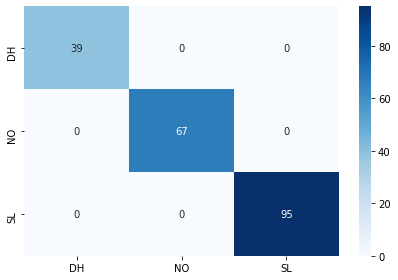

Test Confusion matrix


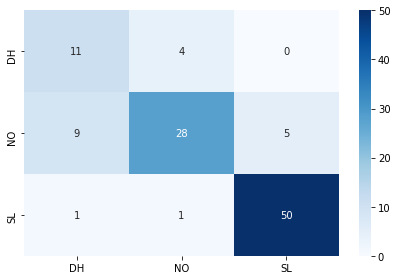

In [9]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

print(f'Train score {accuracy_score(Ytrain_pred,Ytrain)}')
print(f'Test score {accuracy_score(Ytest_pred,Ytest)}')
confusionmatrix(Ytrain_pred,Ytrain,dom='Train')
confusionmatrix(Ytest_pred,Ytest,dom='Test')

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=0, min_samples_leaf=15, min_samples_split=15)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.8256880733944955

In [11]:
Ytrain_pred = clf.predict(Xtrain)
Ytest_pred = clf.predict(Xtest)

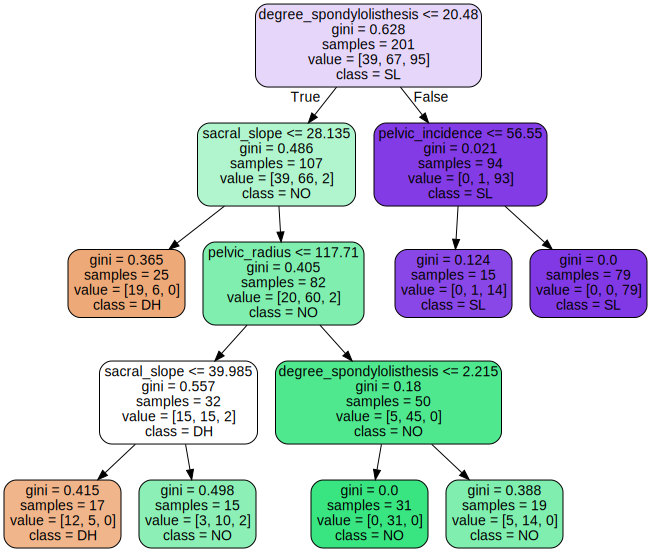

In [12]:
feature_name = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]
dot_data = tree.export_graphviz(clf
                               ,feature_names= feature_name
                               ,class_names=["DH", "NO", "SL"]
                               ,filled= True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [13]:
[*zip(feature_name, clf.feature_importances_)]

[('pelvic_incidence', 0.0012007996825418978),
 ('pelvic_tilt', 0.0),
 ('lumbar_lordosis_angle', 0.0),
 ('sacral_slope', 0.13966867728953142),
 ('pelvic_radius', 0.06813479296266078),
 ('degree_spondylolisthesis', 0.7909957300652659)]

Train score 0.8905472636815921
Test score 0.8256880733944955
Train Confusion matrix


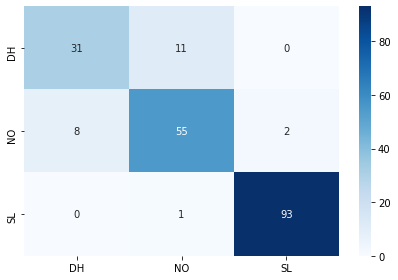

Test Confusion matrix


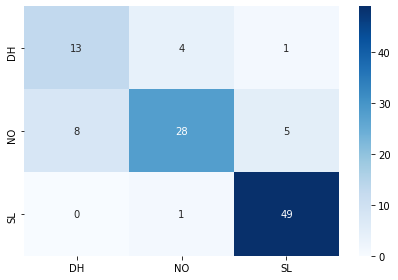

In [14]:
print(f'Train score {accuracy_score(Ytrain_pred,Ytrain)}')
print(f'Test score {accuracy_score(Ytest_pred,Ytest)}')
confusionmatrix(Ytrain_pred,Ytrain,dom='Train')
confusionmatrix(Ytest_pred,Ytest,dom='Test')

>1, train: 0.791, test: 0.743
>2, train: 0.856, test: 0.780
>3, train: 0.861, test: 0.817
>4, train: 0.900, test: 0.835
>5, train: 0.935, test: 0.798
>6, train: 0.965, test: 0.798
>7, train: 0.995, test: 0.835
>8, train: 1.000, test: 0.807
>9, train: 1.000, test: 0.780
>10, train: 1.000, test: 0.798
>11, train: 1.000, test: 0.817
>12, train: 1.000, test: 0.817
>13, train: 1.000, test: 0.789
>14, train: 1.000, test: 0.807
>15, train: 1.000, test: 0.817
>16, train: 1.000, test: 0.789
>17, train: 1.000, test: 0.789
>18, train: 1.000, test: 0.826
>19, train: 1.000, test: 0.826
>20, train: 1.000, test: 0.789


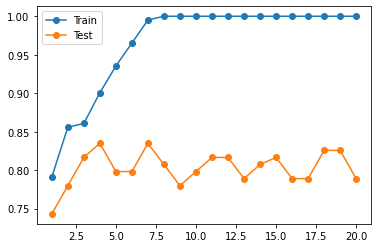

In [15]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
 # configure the model
 model = tree.DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(Xtrain, Ytrain)
 # evaluate on the train dataset
 train_yhat = model.predict(Xtrain)
 train_acc = accuracy_score(Ytrain, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(Xtest)
 test_acc = accuracy_score(Ytest, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15],
         'min_samples_leaf': [2, 3, 4,5]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(Xtrain,Ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15]})

Train score 0.9104477611940298
Test score 0.8348623853211009
Train Confusion matrix


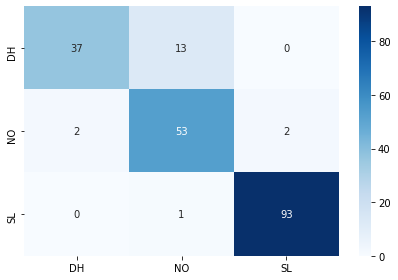

Test Confusion matrix


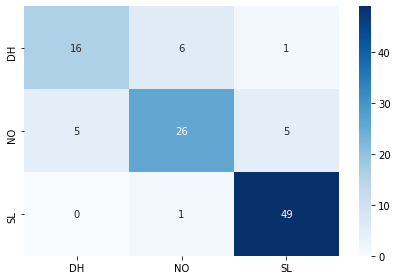

In [17]:
model = gcv.best_estimator_
model.fit(Xtrain,Ytrain)
Ytrain_pred = model.predict(Xtrain)
Ytest_pred = model.predict(Xtest)

print(f'Train score {accuracy_score(Ytrain_pred,Ytrain)}')
print(f'Test score {accuracy_score(Ytest_pred,Ytest)}')
confusionmatrix(Ytrain_pred,Ytrain,dom='Train')
confusionmatrix(Ytest_pred,Ytest,dom='Test')

In [18]:
model

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=12)

In [19]:
[*zip(feature_name, model.feature_importances_)]

[('pelvic_incidence', 0.009218302770808567),
 ('pelvic_tilt', 0.02692943487670025),
 ('lumbar_lordosis_angle', 0.050759808791184476),
 ('sacral_slope', 0.1382949098656046),
 ('pelvic_radius', 0.06137946695008877),
 ('degree_spondylolisthesis', 0.7134180767456134)]

In [20]:
error = 0
index_list = []
Ytest_list = []
ver_list = []
for i, v in enumerate(model.predict(Xtest)):
    if v!= Ytest[i]:
        Ytest_list.append(Ytest[i])
        index_list.append(i)
        ver_list.append(v)
        error+=1
        
print(error)
print(index_list)
print(ver_list)
print(Ytest_list)

18
[0, 3, 14, 27, 38, 39, 40, 59, 60, 61, 72, 73, 82, 89, 92, 99, 102, 106]
[0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2]


In [21]:
Xtest

,0,1,2,3,4,5
105,65.01,27.60,50.95,37.41,116.58,7.02
151,48.03,3.97,58.34,44.06,125.35,35.00
55,47.66,13.28,36.68,34.38,98.25,6.27
271,42.52,16.54,42.00,25.97,120.63,7.88
285,67.80,16.55,43.26,51.25,119.69,4.87
...,...,...,...,...,...,...
134,52.20,17.21,78.09,34.99,136.97,54.94
128,90.51,28.27,69.81,62.24,100.89,58.82
131,69.78,13.78,58.00,56.00,118.93,17.91
108,63.17,6.33,63.00,56.84,110.64,42.61


In [22]:
decision_path = model.decision_path(Xtest)
i = 0
print(index_list)
for row in decision_path:
    if i in index_list:
        print(row)
    i+=1

[0, 3, 14, 27, 38, 39, 40, 59, 60, 61, 72, 73, 82, 89, 92, 99, 102, 106]
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 11)	1
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 15)	1
  (0, 19)	1
  (0, 21)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 15)	1
  (0, 19)	1
  (0, 21)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 15)	1
  (0, 19)	1
  (0, 21)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 15)	1
  (0, 19)	1
  (0, 21)	1
  (0, 0)	1
  (0, 22)	1
  (0, 26)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 15)	1
  (0, 19)	1
  (0, 20)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 11)	1
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 15)	1
  (0, 19)	1
  (0, 21)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 11)	1
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
  (0, 8)	1

In [23]:
Xtest

,0,1,2,3,4,5
105,65.01,27.60,50.95,37.41,116.58,7.02
151,48.03,3.97,58.34,44.06,125.35,35.00
55,47.66,13.28,36.68,34.38,98.25,6.27
271,42.52,16.54,42.00,25.97,120.63,7.88
285,67.80,16.55,43.26,51.25,119.69,4.87
...,...,...,...,...,...,...
134,52.20,17.21,78.09,34.99,136.97,54.94
128,90.51,28.27,69.81,62.24,100.89,58.82
131,69.78,13.78,58.00,56.00,118.93,17.91
108,63.17,6.33,63.00,56.84,110.64,42.61


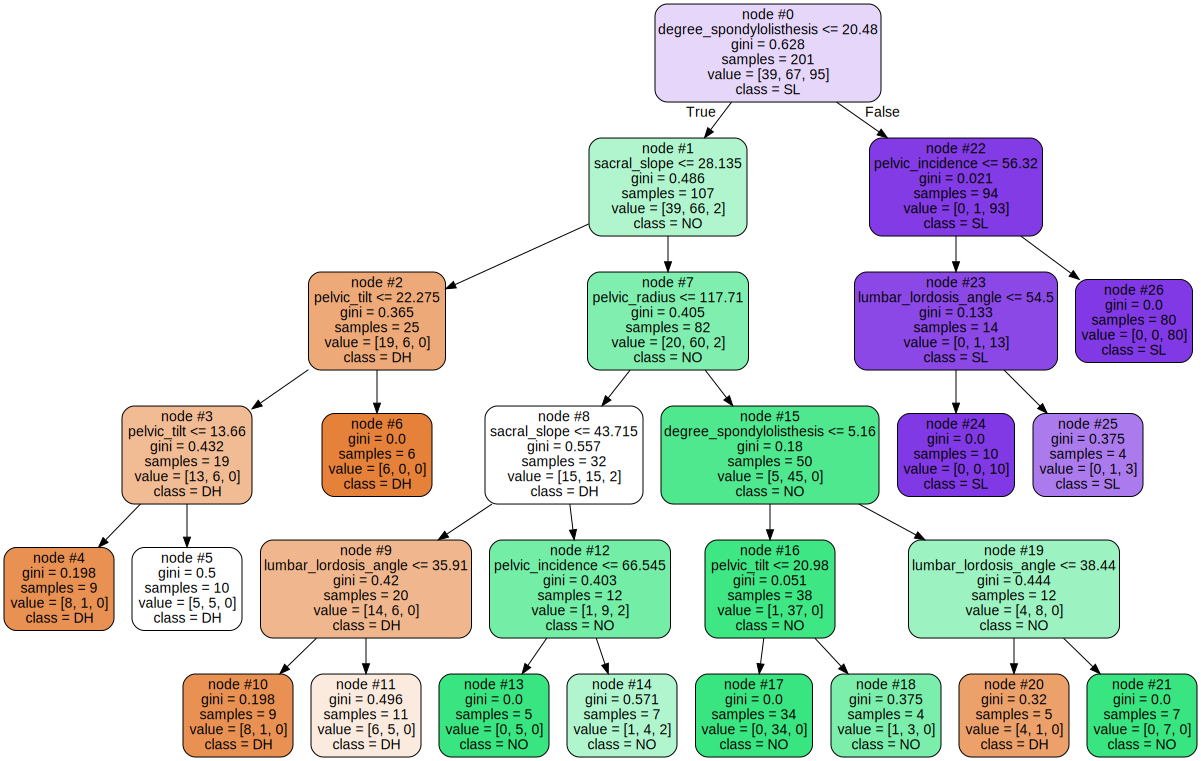

In [24]:
feature_name = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]
dot_data = tree.export_graphviz(model
                               ,feature_names= feature_name
                               ,class_names=["DH", "NO", "SL"]
                               ,filled= True
                               ,rounded=True
                               ,node_ids=True
                               )
graph = graphviz.Source(dot_data)
graph

In [25]:
graph.render("tree1-1", format='png')

'tree1-1.png'

In [26]:
path = clf.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.0042967  0.00442233 0.0048442  0.0049222  0.00685964
 0.00756219 0.0079602  0.01098213 0.01356376 0.02278192 0.03163299
 0.0484908  0.3591189 ]


In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(Xtrain, Ytrain)
    clfs.append(clf)

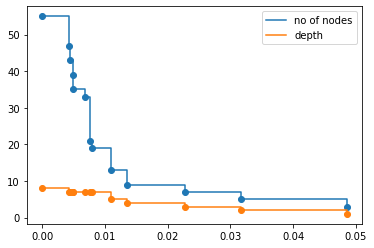

In [28]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

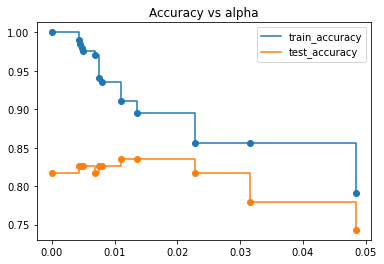

In [29]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(Xtrain)
    y_test_pred = c.predict(Xtest)
    train_acc.append(accuracy_score(y_train_pred,Ytrain))
    test_acc.append(accuracy_score(y_test_pred,Ytest))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8955223880597015
Test score 0.8348623853211009
Train Confusion matrix


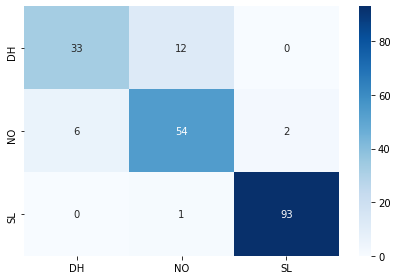

Test Confusion matrix


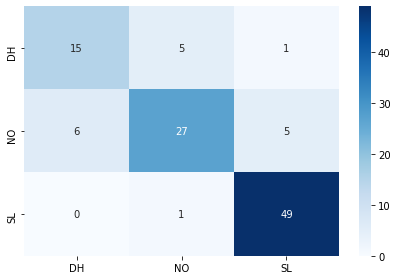

In [30]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(Xtrain,Ytrain)
y_train_pred = clf_.predict(Xtrain)
y_test_pred = clf_.predict(Xtest)

print(f'Train score {accuracy_score(y_train_pred,Ytrain)}')
print(f'Test score {accuracy_score(y_test_pred,Ytest)}')
confusionmatrix(y_train_pred,Ytrain,dom='Train')
confusionmatrix(y_test_pred,Ytest,dom='Test')

In [31]:
clf_

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)